# Myelinated fiber model - assessment of responses to single-node sonication

- SD curve myelinated for different frequencies at default diameter
- SD curve myelinated for different diameters at default frequency
- conclusion about influence of fiber diameter and US frequency and on excitability

## Simulations

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import pandas as pd
import os
import csv

from PySONIC.core import PulsedProtocol, AcousticDrive
from PySONIC.neurons import getPointNeuron
from PySONIC.utils import logger, si_format
from MorphoSONIC.core import SonicFiber, myelinatedFiberReilly, unmyelinatedFiberSundt, NodeAcousticSource, strengthDuration, SonicNode
from MorphoSONIC.plt import SectionCompTimeSeries, strengthDurationCurve
from MorphoSONIC.utils import chronaxie

#Folder used to store the strength duration data
outdir='strengthDurationData'
logger.setLevel(logging.WARNING)

## Single node acoustic (with node model)

In [2]:
# Stimulation parameters
toffset = 10e-3  # s
n_dur = 40
tstim_range = np.logspace(-5, 0, n_dur)  # s
freq = 500e3      #(Hz)
drive = AcousticDrive(f=freq)

Athr_dict = {}

In [24]:
# Myelinated fiber
#a = 32e-9         #(m)
node = SonicNode(getPointNeuron('FH'))
thr = np.zeros(n_dur)

# Loop through parameter sweep
for i, x in enumerate(tstim_range):
    pp = PulsedProtocol(x, toffset)
    thr[i] = node.titrate(drive, pp)   

Athr = np.absolute(thr) 
Athr_dict['Myelinated node'] = Athr

SonicNode(32.0 nm, FrankenhaeuserHuxley, fs=1.00)


 18/02/2020 18:28:21: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:21: No threshold found within the [5.00e+01 - 6.00e+05] interval


In [25]:
# Unmyelinated fiber
#a = 32e-9         #(m)
node = SonicNode(getPointNeuron('sundt'))
thr = np.zeros(n_dur)

# Loop through parameter sweep
for i, x in enumerate(tstim_range):
    pp = PulsedProtocol(x, toffset)
    thr[i] = node.titrate(drive, pp)   

Athr = np.absolute(thr) 
Athr_dict['Unmyelinated node'] = Athr

SonicNode(32.0 nm, Sundt, fs=1.00)


 18/02/2020 18:28:45: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:45: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/02/2020 18:28:46: No threshold found within the [5.00e+01 - 6.00e+05] interval
 18/

<IPython.core.display.Javascript object>


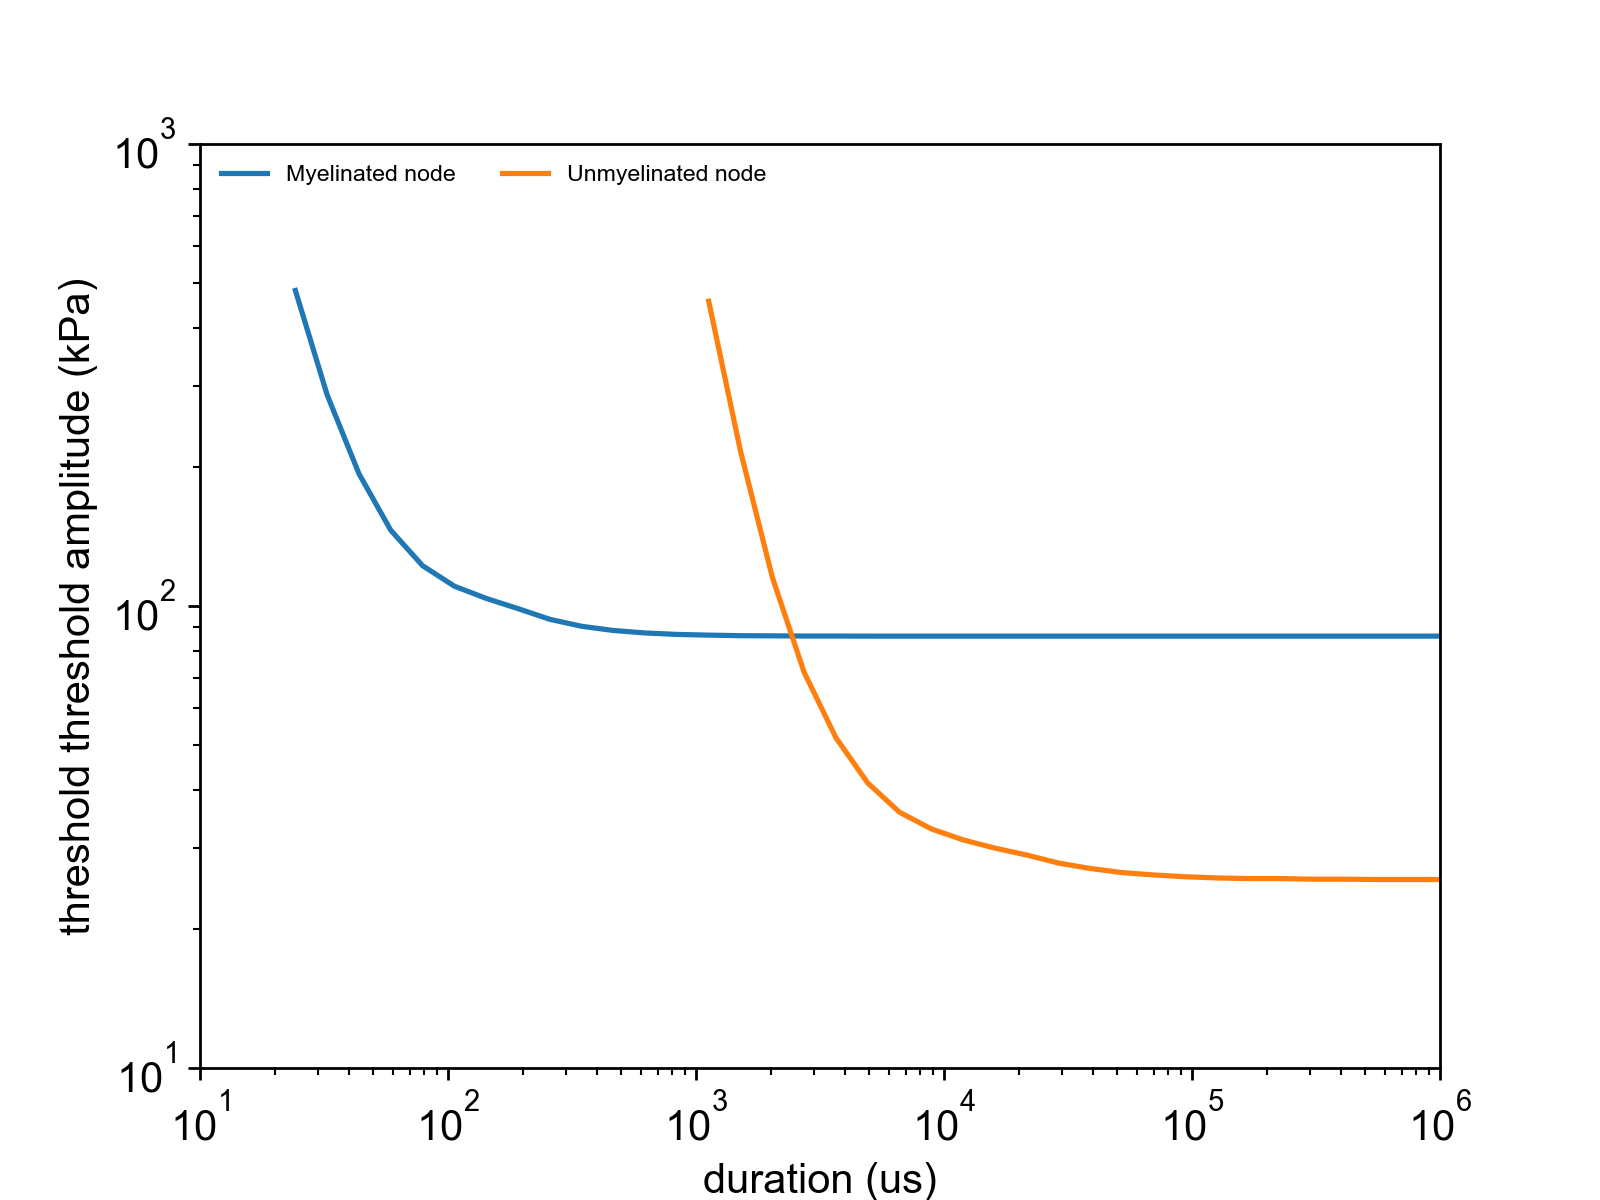

In [26]:
# Plot strength-duration curve
title = ' '
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_dict,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False)

## Single node acoustic stimulation of the fiber

In [3]:
# Stimulation parameters
fiberClass = 'acoustic_single_node'
toffset = 10e-3  # s
n_dur = 20
tstim_range = np.logspace(-5, 0, n_dur)  # s
freq = 500e3

Athr_dict = {}

In [ ]:
logger.setLevel(logging.WARNING)

#Myelinated fiber
fiberType = 'reilly'
fiberD = 10e-6  #(m)
df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq)
Athr = np.absolute(df.values[:,1]) 
Athr_dict[f'freq={(freq*1e-3):.2f} kHz'] = Athr

#Unmyelinated fiber
fiberType = 'sundt'
fiberD = 10e-6  #(m)
df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq)
Athr = np.absolute(df.values[:,1]) 
Athr_dict[f'freq={(freq*1e-3):.2f} kHz'] = Athr

# Plot strength-duration curve
title = ' '
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_dict,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[5e4, 1e6])

senn_SONIC_FH_32nm_fs100%_500kHz_fiberD10.00um_tstim10.0us-1.0s_strengthduration_results.csv
senn_SONIC_sundt_32nm_fs100%_500kHz_fiberD10.00um_tstim10.0us-1.0s_strengthduration_results.csv


The single node acoustic stimulation applied to the **myelinated fiber** gives the same strength-duration results obtained stimuling the myelinated node. 

The **unmyelinated fiber** instead behaves differently: we can obtained a clear SD curve stimuling the umyelinated node (curve similar to the ones obtained with the planar transducer stimulation), but the fiber cannot be excited by the single node acoustic stimulation.

## SD curve varying the frequency

<IPython.core.display.Javascript object>


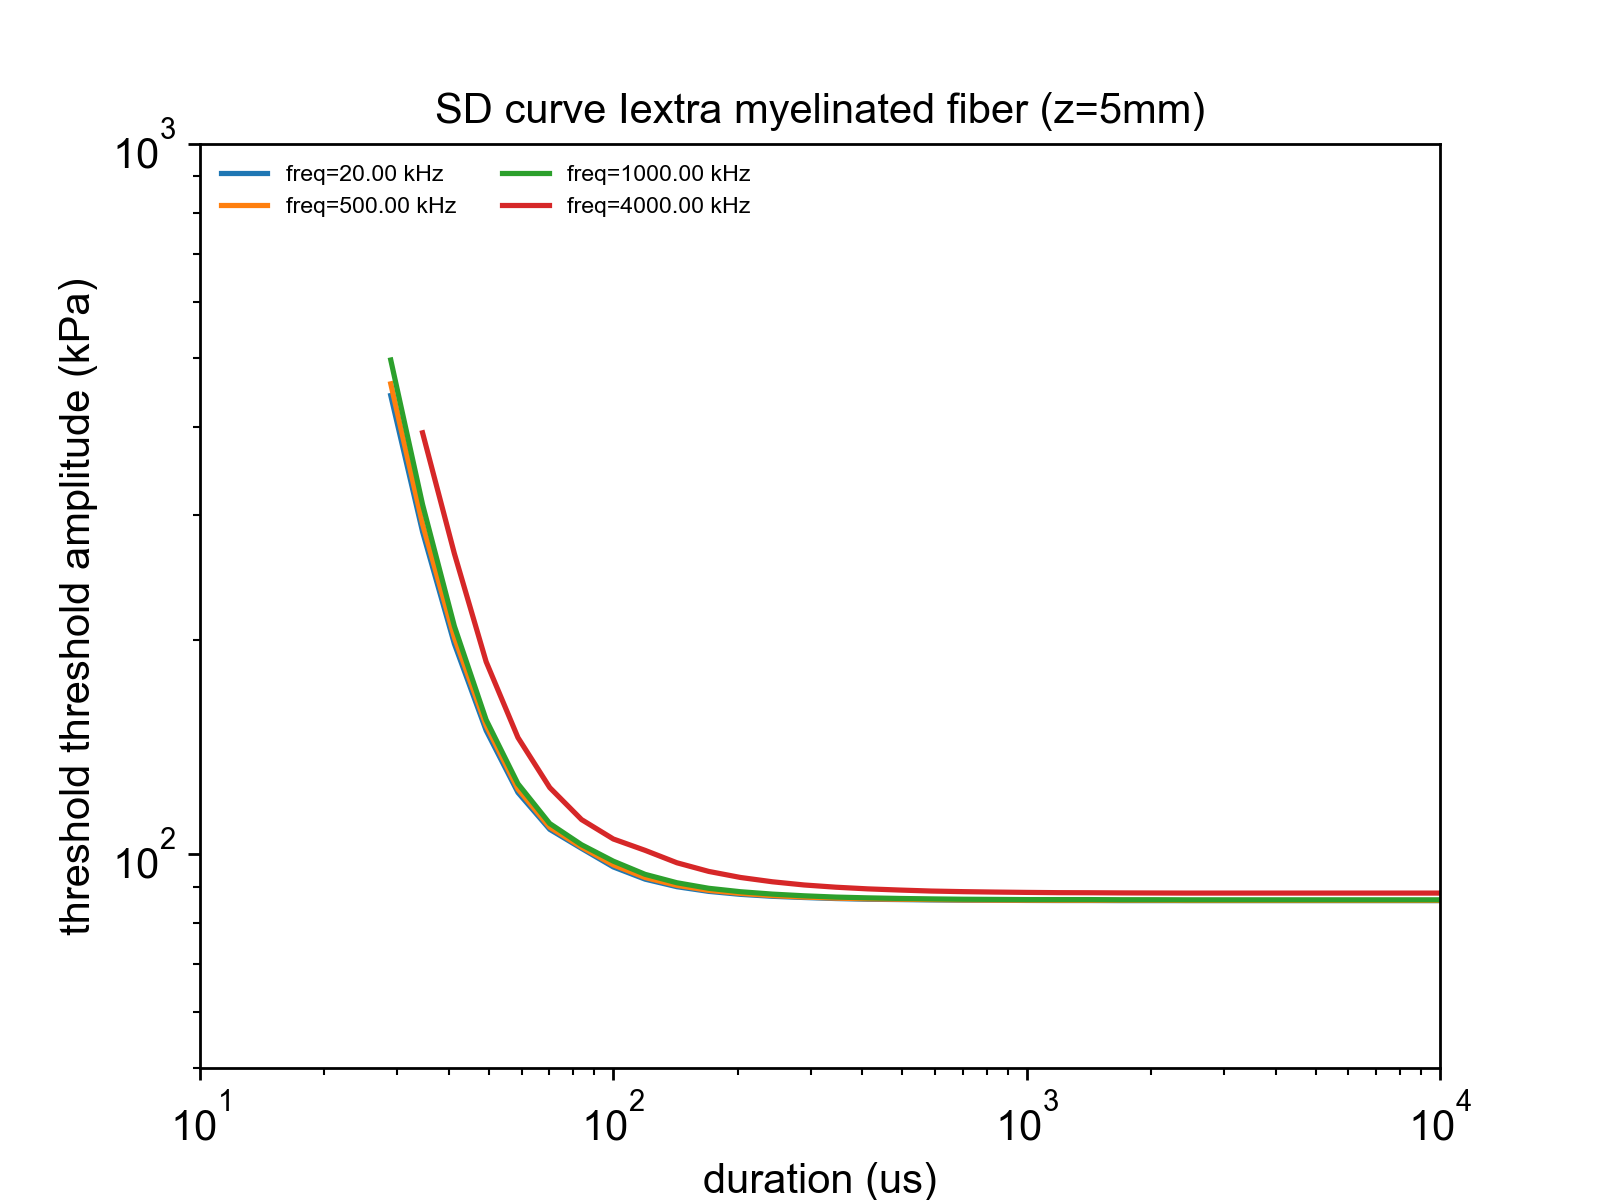

In [3]:
# Parameters fixed: fiber diameter 12.5 um, sonophore diameter 32 nm
# Frequency studied in the interval 100-1000 kHz
fiberType = 'reilly'
fiberD = 12.5e-6  #(m)
a = 32e-9         #(m)
freq_range = [20e3, 500e3, 1e6, 4e6]
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, freq in enumerate(freq_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1]) 
    Athr_myel[f'freq={(freq*1e-3):.2f} kHz'] = Athr

# Plot strength-duration curve, zsource=5mm
title = 'SD curve Iextra myelinated fiber (z=5mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[5e4, 1e6])

## SD curve varying the diameter

<IPython.core.display.Javascript object>


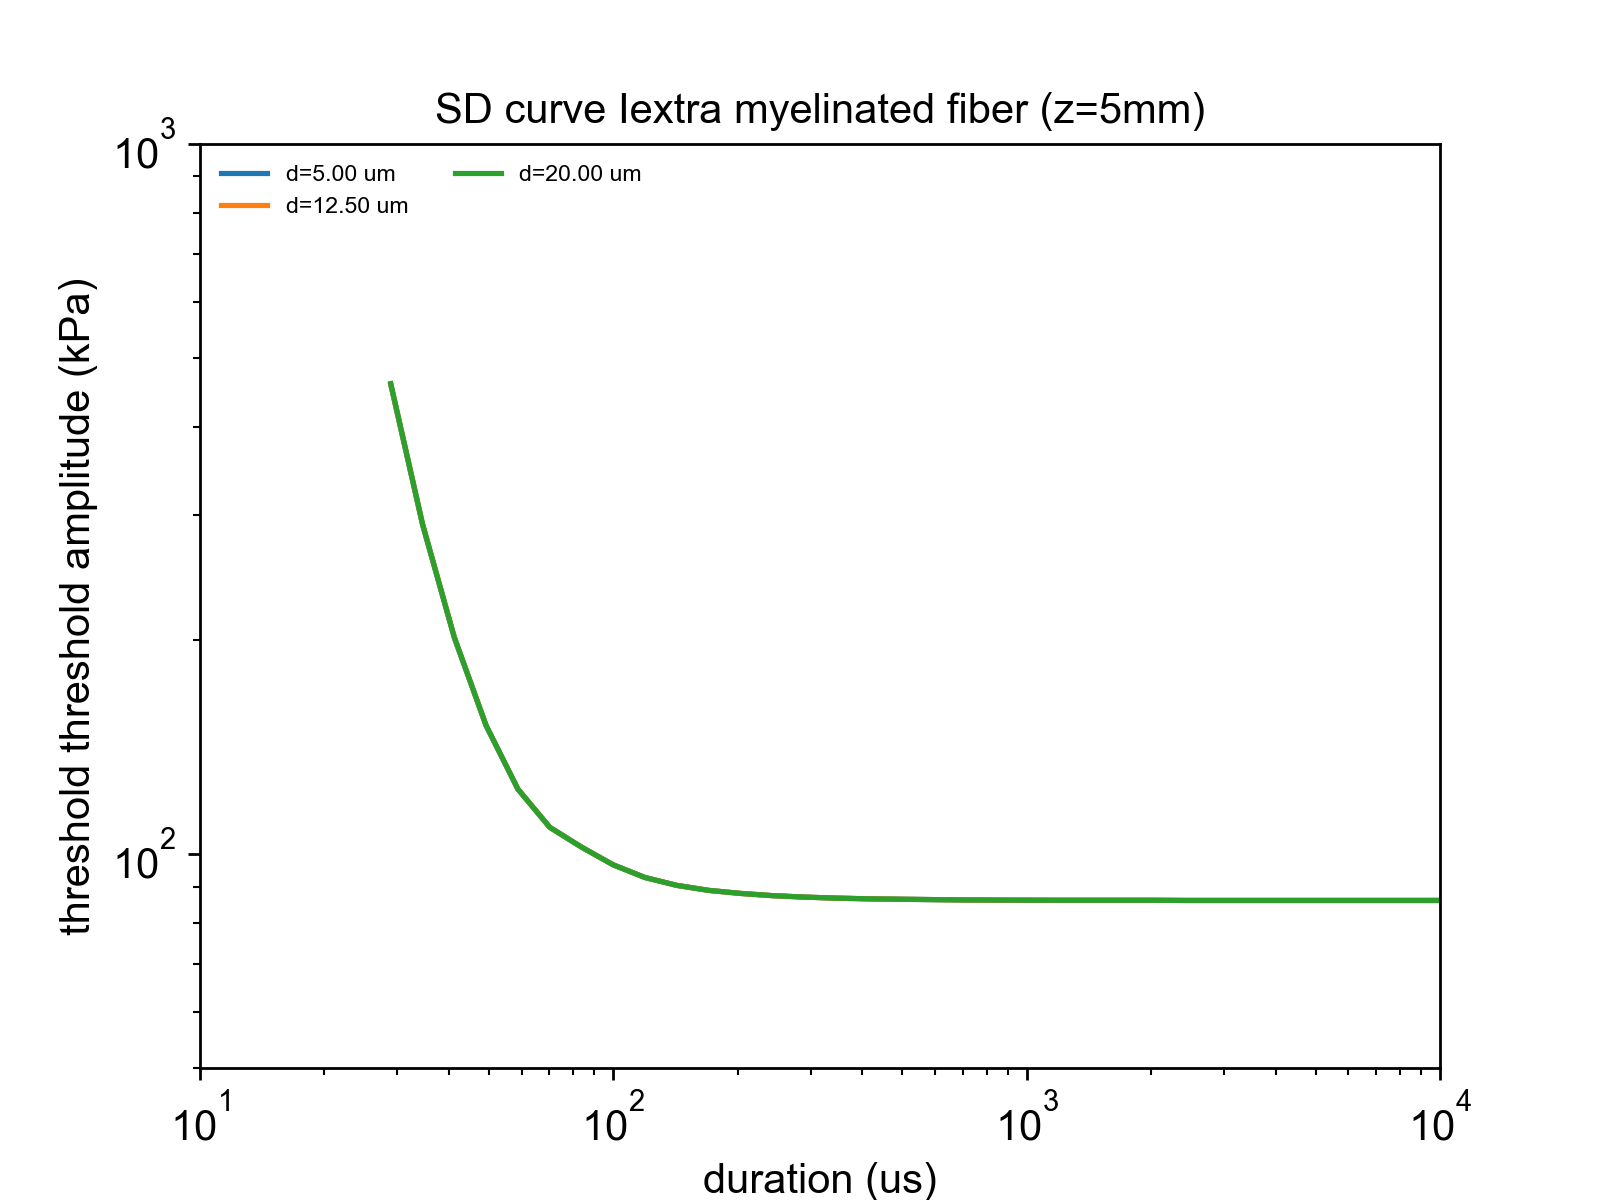

In [5]:
# Parameters fixed: stimulation frequency 500 kHz, sonophore diameter 32 nm
# Fiber diameter studied in the interval 5-20 um
freq = 500e3      #(Hz)
a = 32e-9         #(m)
diam_range = np.linspace(5e-6, 20e-6, 3)
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'd={(fiberD*1e6):.2f} um'] = Athr

# Plot strength-duration curve, zsource=5mm
title = 'SD curve Iextra myelinated fiber'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[5e4, 1e6])

## SD curve varying the sonophore diameter

<IPython.core.display.Javascript object>


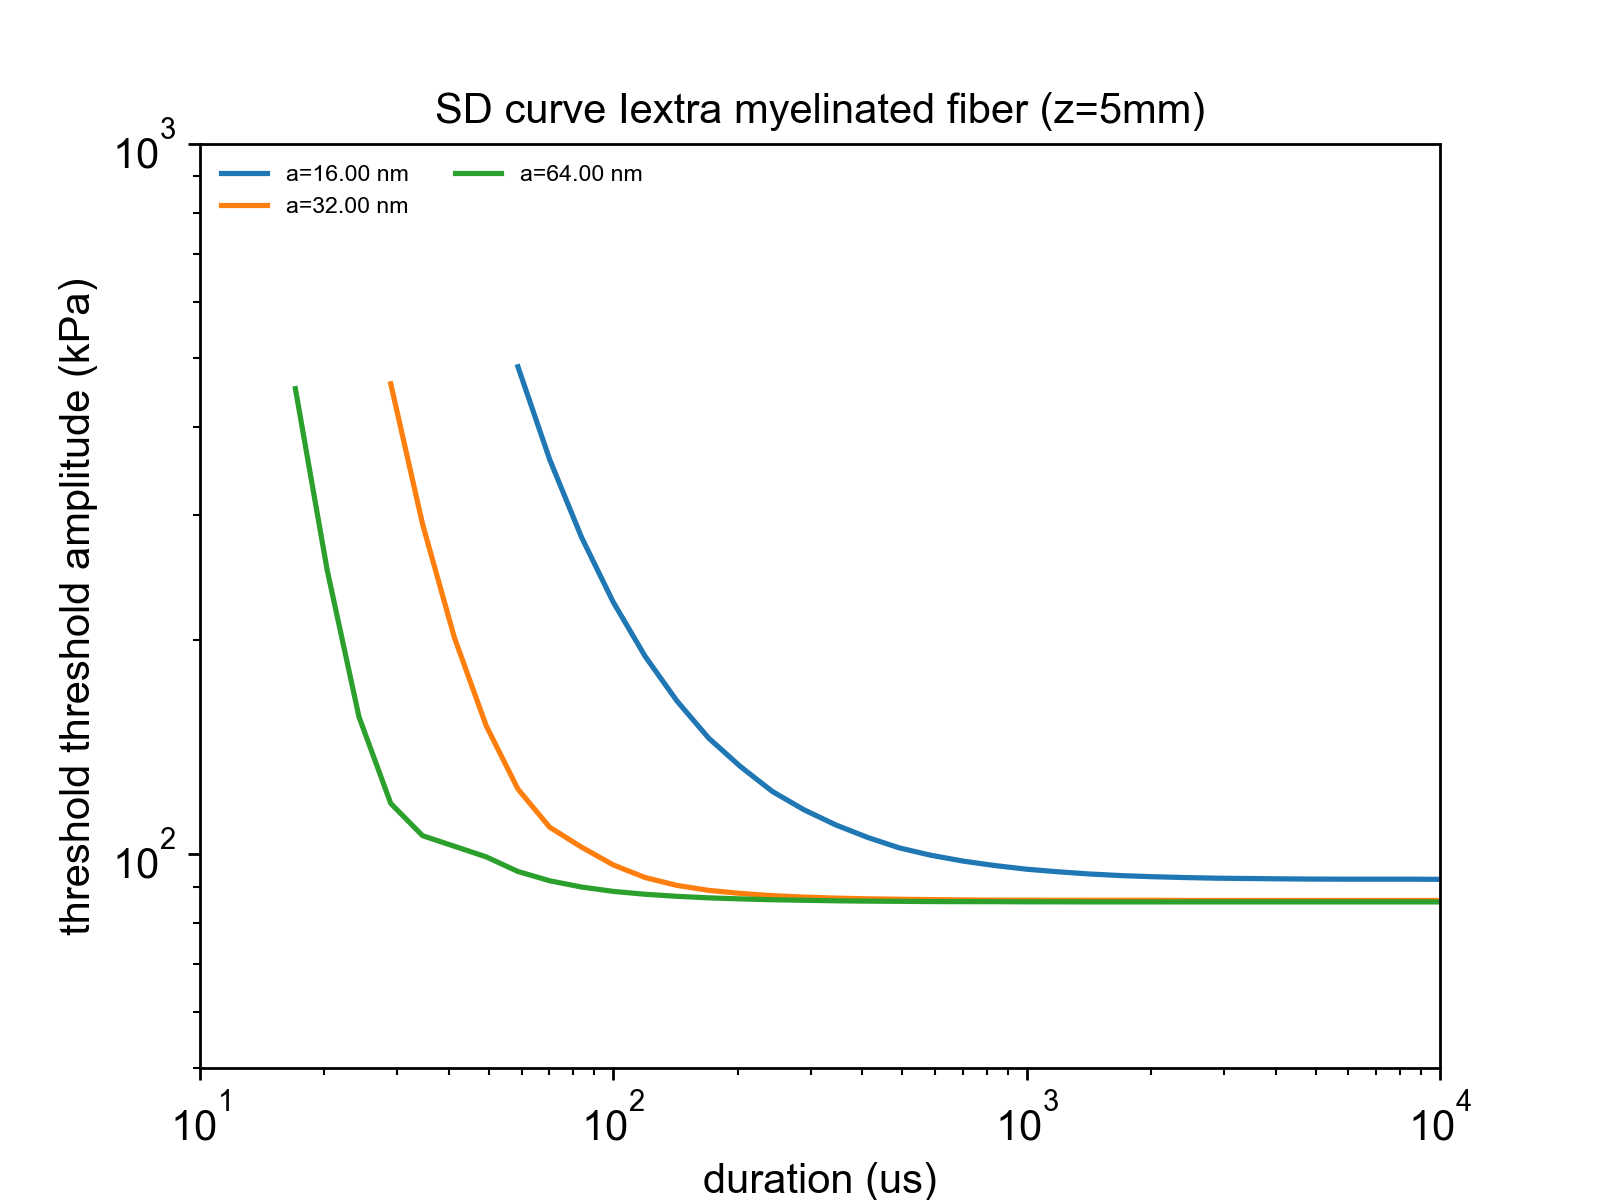

In [7]:
# Parameters fixed: stimulation frequency 500 kHz, fiber diameter 12.5 um
# Sonophore diameter studied in the interval   nm 
fiberD = 12.5e-6  #(m)
freq = 500e3      #(Hz)
a_range = [16e-9, 32e-9, 64e-9]
logger.setLevel(logging.WARNING)
Athr_myel = {}

#Strength-duration results
for i, a in enumerate(a_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, a=a)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'a={(a*1e9):.2f} nm'] = Athr

# Plot strength-duration curve, zsource=5mm
title = 'SD curve Iextra myelinated fiber (z=5mm)'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='threshold amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[5e4, 1e6])

## Simulations

### Fiber model

In [3]:
a = 32e-9                       # sonophore diameter (m)
Fdrive = 500e3                  # US frequency (Hz)
fs = 1                          # sonophore membrane coverage (-)
fiber = myelinatedFiberReilly(SonicFiber, 10e-6, a=a, Fdrive=Fdrive, fs=fs)

### Stimulation parameters

In [4]:
pp = PulsedProtocol(3e-3, 3e-3)
psource = NodeAcousticSource(0, Fdrive)

### Simulation

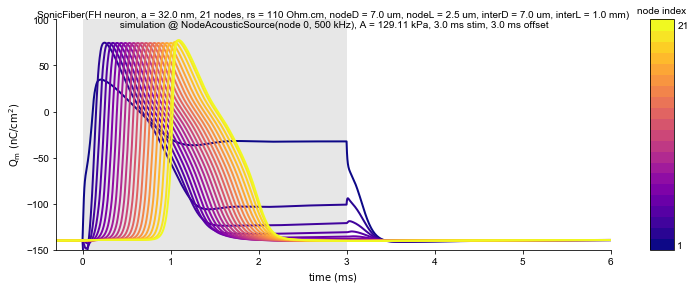

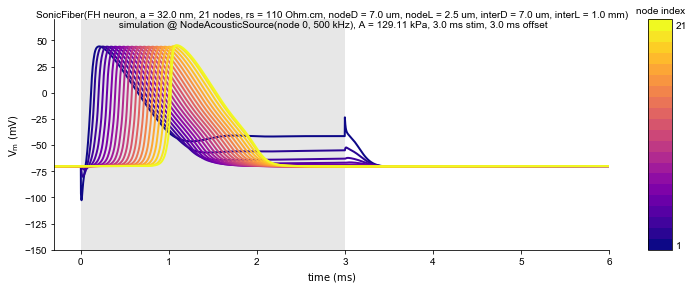

In [5]:
Athr = fiber.titrate(psource, pp)  # Pa
data, meta = fiber.simulate(psource, 1.5 * Athr, pp)
fig1 = SectionCompTimeSeries([(data, meta)], 'Qm', fiber.ids).render()
fig2 = SectionCompTimeSeries([(data, meta)], 'Vm', fiber.ids).render()

To obtain valuable results one have to stimulate the fiber with 1.5 $A_{thrs}$ stimulation amplitudes. Thus, the whole system can be stimulated and not only the central node. 
- With the stimulation onset first thing we see is the rapid voltage drop. The US stimulus generates an instantaneous drop in effective membrane capacitance that hyperpolarizes $V_{m}$ to a value far below its resting potential. This initial voltage drop in the central node is followed by the rapid changes in the charge. The membrane charge density in the central node progressively increases due to the leakage currents. This is happening until the spiking-threshold. At this point neuron starts its spiking. After the start of the stimulation the neigbouring neurons are trying to synchronize with the central one. $V_{m}$ imbalance drives significant axial currents that equilibrate the membrane potentials of the nodes almost instantaneously to an intermediate value (ca. -75 $mV$). This equilibration through axial currents drives instantaneous changes in membrane charge density (increase at the stimulated node, decrease at the neighbouring nodes) The time constants are higher for the nodes that are located further. After the stimulation onset the axial current from the central node also increases the membrane charge densities at the neighboring nodes in order to equilibrate the effective membrane potentials.
- At the spiking phase $Q_m$ reaches a threshold value at the central node that drives ion channels opening and triggers a spike. The neighboring nodes also reach their spiking thresholds and open own ion channels which initiate the spikes. In terms of voltages the nodes behaviors are exactly the same as they are locked with the axial-driven currents. Nevertheless, the neighboring nodes show larger charge density variations since their effective electrical system is not modulated by US.
- With the stimulus offset the effective membrane capacitance of the central node restores to its resting value which can be seen in a rapid voltage change. As all the nodes now have the same capacitance and are "$V_{m}$-locked" through axial conduction, both $Q_m$ and $V_{m}$ evolve in synchrony.

One important difference in the node behaviors in terms of voltages is noticeable right after spike hyperpolarization phase. The resting voltage differ for a central node (the node we stimulate with ultrasound) in comparison to adjacent nodes. This could be measured during the experimental validation phase as we will have direct access to the membrane voltage data.